# Python编程基础和常用模块练习题


## 习题1：生成器

1.1  
函数f(N)返回一个生成器。该生成器产生的是一个整数序列，从N开始，依次加一递增。  
写出f(N)函数，并进行测试。请注意该生成器产生的数列长度是无穷大，在测试时需要加以控制，以免死循环。

In [ ]:
# 定义函数f(N)
def f(N):
    # 在此处补全代码
    i = N
    while(1):
        yield(i)
        i = i + 1

In [ ]:
# 对函数f进行测试，输出应与下面列出的一致
for i,v in enumerate(f(10)):
    if i>20:
        break
    else:
        print(i,v)

1.2  
函数g(N)判断N是否为正偶数。即g(-10)返回False，g(2)返回True，g(5)返回False，g(7.5)返回False。  
写出该函数定义，并进行测试。

In [ ]:
# 定义函数g(N)
def g(N):
    # 在此处补全代码
    return N > 0 and N % 2 == 0

In [ ]:
# 对函数g进行测试，返回结果应为“(False, True, False, False)”
g(-10), g(2), g(5), g(7.5)

1.3  
函数h(G,P)返回一个生成器，参数G是一个生成器或者列表，P是判断条件，h返回的是G产生的序列中符合P判断为True的序列。  
写出h的定义，并利用1.1和1.2定义的f和g作为G和P来测试h。

In [28]:
# 定义函数h(G,P)
def h(G,P):
    # 在此处补全代码
    for i in G:
        if P(i) :
            yield(i)

In [29]:
# 对函数h进行测试，运行结果应该如下面代码的输出
for i,v in enumerate(h(f(-5),g)):
    if i>10:
        break
    else:
        print(i,v)

0 2
1 4
2 6
3 8
4 10
5 12
6 14
7 16
8 18
9 20
10 22


1.4 特殊用途的生成器举例

In [7]:
# 下面的这个生成器可以产生差分序列，也就是将输入序列前后两个值之差构成的数列返回。
# 学习并掌握这种生成器的编程方法，并使用不同的列表和生成器作为输入进行测试。

def difference_generator(sequence):
    init_flag=True
    last_value=0
    for item in sequence:
        if init_flag:
            last_value=item
            init_flag=False
        else:
            diff=item-last_value
            last_value=item
            yield(diff)
def difference_generator2(sequence):
    if( len(sequence) < 2 ) :
        return;
    pre_value = sequence[0]
    for item in sequence[1:]:
        diff = item - pre_value
        pre_value = item
        yield(diff)            

In [8]:
a=[1,2,4,3,1,2,4,2,1]
for v in difference_generator(a):
    print(v)

1
2
-1
-2
1
2
-2
-1


In [9]:
for v in difference_generator(range(0,20,3)):
    print(v)

3
3
3
3
3
3


## 习题2：列表、字典、CSV、JSON文件操作

2.1  
从CSV文件“data/wtr.csv”中读取数据记录。  
将表头部分放在列表field_name_list中，结果应为“['personal_id', 'name', 'month', 'working_days']”  
将数据部分放在列表record_list中，结果类似于：[['1000', 'zhao', '1', '17'], ['1000', 'zhao', '2', '16'], ...... ['1007', 'wang', '11', '20'], ['1007', 'wang', '12', '21']]

In [32]:
import os
import csv

In [33]:
DATA_DIR='data'
csv_file='wtr.csv'

In [35]:
csv_filename=os.path.join(DATA_DIR,csv_file)
csv_filename

'data/wtr.csv'

In [52]:
# 在此处补全代码
# 将表头部分放在列表field_name_list中
# 将数据部分放在列表record_lis
with open(csv_filename) as f :
    f_csv = csv.reader( f )
    cur_line = 0
    field_name_list = []
    record_list = []
    for row in f_csv:
        if( 0 == cur_line):
            field_name_list = row
        else :
            record_list.append(row)
        cur_line = cur_line + 1 
        

In [53]:
field_name_list

['personal_id', 'name', 'month', 'working_days']

In [56]:
record_list

[['1000', 'zhao', '1', '17'],
 ['1000', 'zhao', '2', '16'],
 ['1000', 'zhao', '3', '18'],
 ['1000', 'zhao', '4', '21'],
 ['1000', 'zhao', '5', '17'],
 ['1000', 'zhao', '6', '18'],
 ['1000', 'zhao', '7', '17'],
 ['1000', 'zhao', '8', '20'],
 ['1000', 'zhao', '9', '17'],
 ['1000', 'zhao', '10', '21'],
 ['1000', 'zhao', '11', '16'],
 ['1000', 'zhao', '12', '17'],
 ['1001', 'qian', '1', '19'],
 ['1001', 'qian', '2', '17'],
 ['1001', 'qian', '3', '21'],
 ['1001', 'qian', '4', '20'],
 ['1001', 'qian', '5', '17'],
 ['1001', 'qian', '6', '19'],
 ['1001', 'qian', '7', '22'],
 ['1001', 'qian', '8', '20'],
 ['1001', 'qian', '9', '18'],
 ['1001', 'qian', '10', '16'],
 ['1001', 'qian', '11', '19'],
 ['1001', 'qian', '12', '17'],
 ['1002', 'sun', '1', '17'],
 ['1002', 'sun', '2', '19'],
 ['1002', 'sun', '3', '20'],
 ['1002', 'sun', '4', '17'],
 ['1002', 'sun', '5', '22'],
 ['1002', 'sun', '6', '18'],
 ['1002', 'sun', '7', '22'],
 ['1002', 'sun', '8', '19'],
 ['1002', 'sun', '9', '19'],
 ['1002', 'su

2.2  
编写函数将数据记录中的类型进行转换：  
personal_id ：整数  
name        ：字符串  
month       ：整数  
working_days：整数  

In [87]:
field_type_dict={'personal_id':'int',
                 'name':'string',
                 'month':'int',
                 'working_days':'int'}

convertion_dict={'int': lambda x: int(x),
                 'string': lambda x: str(x)}

def convert_value(value,type):
    return convertion_dict[type](value)

def convert_record_type(record,fieldname_list):
    # 在此处补全代码
    # 返回值类型转换后的数据记录
    return [ convert_value(v, field_type_dict[attr]) for (attr,v) in dict(zip(fieldname_list, record)).items() ]


In [88]:
convert_record_type(record_list[0],field_name_list)

[1000, 'zhao', 1, 17]

In [89]:
[convert_record_type(i, field_name_list) for i in record_list ]# 在此处补全代码，使用list comprehension方式将所有记录进行转换，生成的结果应与下面的output一致

[[1000, 'zhao', 1, 17],
 [1000, 'zhao', 2, 16],
 [1000, 'zhao', 3, 18],
 [1000, 'zhao', 4, 21],
 [1000, 'zhao', 5, 17],
 [1000, 'zhao', 6, 18],
 [1000, 'zhao', 7, 17],
 [1000, 'zhao', 8, 20],
 [1000, 'zhao', 9, 17],
 [1000, 'zhao', 10, 21],
 [1000, 'zhao', 11, 16],
 [1000, 'zhao', 12, 17],
 [1001, 'qian', 1, 19],
 [1001, 'qian', 2, 17],
 [1001, 'qian', 3, 21],
 [1001, 'qian', 4, 20],
 [1001, 'qian', 5, 17],
 [1001, 'qian', 6, 19],
 [1001, 'qian', 7, 22],
 [1001, 'qian', 8, 20],
 [1001, 'qian', 9, 18],
 [1001, 'qian', 10, 16],
 [1001, 'qian', 11, 19],
 [1001, 'qian', 12, 17],
 [1002, 'sun', 1, 17],
 [1002, 'sun', 2, 19],
 [1002, 'sun', 3, 20],
 [1002, 'sun', 4, 17],
 [1002, 'sun', 5, 22],
 [1002, 'sun', 6, 18],
 [1002, 'sun', 7, 22],
 [1002, 'sun', 8, 19],
 [1002, 'sun', 9, 19],
 [1002, 'sun', 10, 22],
 [1002, 'sun', 11, 17],
 [1002, 'sun', 12, 19],
 [1003, 'li', 1, 18],
 [1003, 'li', 2, 22],
 [1003, 'li', 3, 20],
 [1003, 'li', 4, 19],
 [1003, 'li', 5, 16],
 [1003, 'li', 6, 17],
 [1003,

In [90]:
new_record_list=[convert_record_type(i, field_name_list) for i in record_list ]# 在此处补全代码，使用list comprehension方式将所有记录进行转换（跟上面的cell内容一致即可）

In [91]:
new_record_list

[[1000, 'zhao', 1, 17],
 [1000, 'zhao', 2, 16],
 [1000, 'zhao', 3, 18],
 [1000, 'zhao', 4, 21],
 [1000, 'zhao', 5, 17],
 [1000, 'zhao', 6, 18],
 [1000, 'zhao', 7, 17],
 [1000, 'zhao', 8, 20],
 [1000, 'zhao', 9, 17],
 [1000, 'zhao', 10, 21],
 [1000, 'zhao', 11, 16],
 [1000, 'zhao', 12, 17],
 [1001, 'qian', 1, 19],
 [1001, 'qian', 2, 17],
 [1001, 'qian', 3, 21],
 [1001, 'qian', 4, 20],
 [1001, 'qian', 5, 17],
 [1001, 'qian', 6, 19],
 [1001, 'qian', 7, 22],
 [1001, 'qian', 8, 20],
 [1001, 'qian', 9, 18],
 [1001, 'qian', 10, 16],
 [1001, 'qian', 11, 19],
 [1001, 'qian', 12, 17],
 [1002, 'sun', 1, 17],
 [1002, 'sun', 2, 19],
 [1002, 'sun', 3, 20],
 [1002, 'sun', 4, 17],
 [1002, 'sun', 5, 22],
 [1002, 'sun', 6, 18],
 [1002, 'sun', 7, 22],
 [1002, 'sun', 8, 19],
 [1002, 'sun', 9, 19],
 [1002, 'sun', 10, 22],
 [1002, 'sun', 11, 17],
 [1002, 'sun', 12, 19],
 [1003, 'li', 1, 18],
 [1003, 'li', 2, 22],
 [1003, 'li', 3, 20],
 [1003, 'li', 4, 19],
 [1003, 'li', 5, 16],
 [1003, 'li', 6, 17],
 [1003,

2.3  
编写函数将上一步输出的数据列表转换成为字典形式：  
{personal_id_1: {'name': name_01, 'wtr': {1:21,2:19,......,12:20}},  
 personal_id_2: {'name': name_02, 'wtr': {1:20,2:18,......,12:22}},  
 ......  
 personal_id_N: {'name': name_05, 'wtr': {1:21,2:19,......,12:20}}}  

In [94]:
# 编写数据格式转换函数convert_record_list_to_dict
def get_personal_id(record):
    return record[0]

def get_name(record):
    return record[1]

def get_month(record):
    return record[2]

def get_workdays(record):
    return record[3]

def convert_record_list_to_dict(record_list):
    dict0=dict()
    
    # 在此处补全代码   
    for record in record_list :
        
        person_id = get_personal_id(record) 
        name = get_name(record)
        month = get_month(record)
        workdays = get_workdays(record)
        
        if person_id in dict0 :
            dict0[person_id]['wtr'][month] = workdays
        else :
            dict0[person_id] = {'name':name, 'wtr':{month:workdays}}
    
    return dict0

In [97]:
# 对函数convert_record_list_to_dict进行测试
convert_record_list_to_dict(new_record_list)

{1000: {'name': 'zhao',
  'wtr': {1: 17,
   2: 16,
   3: 18,
   4: 21,
   5: 17,
   6: 18,
   7: 17,
   8: 20,
   9: 17,
   10: 21,
   11: 16,
   12: 17}},
 1001: {'name': 'qian',
  'wtr': {1: 19,
   2: 17,
   3: 21,
   4: 20,
   5: 17,
   6: 19,
   7: 22,
   8: 20,
   9: 18,
   10: 16,
   11: 19,
   12: 17}},
 1002: {'name': 'sun',
  'wtr': {1: 17,
   2: 19,
   3: 20,
   4: 17,
   5: 22,
   6: 18,
   7: 22,
   8: 19,
   9: 19,
   10: 22,
   11: 17,
   12: 19}},
 1003: {'name': 'li',
  'wtr': {1: 18,
   2: 22,
   3: 20,
   4: 19,
   5: 16,
   6: 17,
   7: 20,
   8: 18,
   9: 18,
   10: 19,
   11: 19,
   12: 17}},
 1004: {'name': 'zhou',
  'wtr': {1: 18,
   2: 21,
   3: 22,
   4: 17,
   5: 19,
   6: 18,
   7: 20,
   8: 16,
   9: 19,
   10: 21,
   11: 20,
   12: 17}},
 1005: {'name': 'wu',
  'wtr': {1: 17,
   2: 20,
   3: 17,
   4: 19,
   5: 22,
   6: 21,
   7: 19,
   8: 16,
   9: 16,
   10: 21,
   11: 16,
   12: 22}},
 1006: {'name': 'zheng',
  'wtr': {1: 16,
   2: 21,
   3: 22,
   4: 2

In [98]:
record_dict=convert_record_list_to_dict(new_record_list)

In [99]:
print(record_dict)

{1000: {'name': 'zhao', 'wtr': {1: 17, 2: 16, 3: 18, 4: 21, 5: 17, 6: 18, 7: 17, 8: 20, 9: 17, 10: 21, 11: 16, 12: 17}}, 1001: {'name': 'qian', 'wtr': {1: 19, 2: 17, 3: 21, 4: 20, 5: 17, 6: 19, 7: 22, 8: 20, 9: 18, 10: 16, 11: 19, 12: 17}}, 1002: {'name': 'sun', 'wtr': {1: 17, 2: 19, 3: 20, 4: 17, 5: 22, 6: 18, 7: 22, 8: 19, 9: 19, 10: 22, 11: 17, 12: 19}}, 1003: {'name': 'li', 'wtr': {1: 18, 2: 22, 3: 20, 4: 19, 5: 16, 6: 17, 7: 20, 8: 18, 9: 18, 10: 19, 11: 19, 12: 17}}, 1004: {'name': 'zhou', 'wtr': {1: 18, 2: 21, 3: 22, 4: 17, 5: 19, 6: 18, 7: 20, 8: 16, 9: 19, 10: 21, 11: 20, 12: 17}}, 1005: {'name': 'wu', 'wtr': {1: 17, 2: 20, 3: 17, 4: 19, 5: 22, 6: 21, 7: 19, 8: 16, 9: 16, 10: 21, 11: 16, 12: 22}}, 1006: {'name': 'zheng', 'wtr': {1: 16, 2: 21, 3: 22, 4: 20, 5: 19, 6: 20, 7: 20, 8: 22, 9: 17, 10: 21, 11: 17, 12: 20}}, 1007: {'name': 'wang', 'wtr': {1: 18, 2: 20, 3: 21, 4: 20, 5: 17, 6: 17, 7: 22, 8: 19, 9: 21, 10: 20, 11: 20, 12: 21}}}


用pprint将数据集格式化打印

In [100]:
from pprint import pprint

In [101]:
pprint(record_dict,indent=4)

{   1000: {   'name': 'zhao',
              'wtr': {   1: 17,
                         2: 16,
                         3: 18,
                         4: 21,
                         5: 17,
                         6: 18,
                         7: 17,
                         8: 20,
                         9: 17,
                         10: 21,
                         11: 16,
                         12: 17}},
    1001: {   'name': 'qian',
              'wtr': {   1: 19,
                         2: 17,
                         3: 21,
                         4: 20,
                         5: 17,
                         6: 19,
                         7: 22,
                         8: 20,
                         9: 18,
                         10: 16,
                         11: 19,
                         12: 17}},
    1002: {   'name': 'sun',
              'wtr': {   1: 17,
                         2: 19,
                         3: 20,
                         4: 17,
     

In [102]:
# 执行下列代码，练习使用字典访问数据的方法
record_dict[1000]['name'],record_dict[1000]['wtr'],record_dict[1000]['wtr'][9]

('zhao',
 {1: 17,
  2: 16,
  3: 18,
  4: 21,
  5: 17,
  6: 18,
  7: 17,
  8: 20,
  9: 17,
  10: 21,
  11: 16,
  12: 17},
 17)

2.4  
将数据保存为JSON文件

In [106]:
import json

In [107]:
json_file='wtr.json'
json_file_path=os.path.join(DATA_DIR,json_file)

In [114]:
# 编写代码，将2.3生成的字典形式的数据以JSON格式进行存储。为了增加文件的可读性，最好在调用json.dump或json.dumps时指定参数indent。
# 
# 在此处补全代码
# 
with open(json_file_path, 'w') as fw :
    json.dump(record_dict, fw, indent=4)

In [115]:
# 将json文件的内容逐行打印出来，并观察文件内容，尤其是key的表达方式。上一步需要正常执行，这一步才能得到正确结果。
with open(json_file_path, 'r') as f:
    for line in f:
        print(line.rstrip())

{
    "1000": {
        "name": "zhao",
        "wtr": {
            "1": 17,
            "2": 16,
            "3": 18,
            "4": 21,
            "5": 17,
            "6": 18,
            "7": 17,
            "8": 20,
            "9": 17,
            "10": 21,
            "11": 16,
            "12": 17
        }
    },
    "1001": {
        "name": "qian",
        "wtr": {
            "1": 19,
            "2": 17,
            "3": 21,
            "4": 20,
            "5": 17,
            "6": 19,
            "7": 22,
            "8": 20,
            "9": 18,
            "10": 16,
            "11": 19,
            "12": 17
        }
    },
    "1002": {
        "name": "sun",
        "wtr": {
            "1": 17,
            "2": 19,
            "3": 20,
            "4": 17,
            "5": 22,
            "6": 18,
            "7": 22,
            "8": 19,
            "9": 19,
            "10": 22,
            "11": 17,
            "12": 19
        }
    },
    "1003": {
       

可以看到原本数字形式的key都转换成文本了

In [116]:
# 编写代码，将json文件读取到字典record_dict_1中，并打印出来，观察key和value的形式。
# 
# 在此处补全代码
# 
with open(json_file_path, 'r') as f:
    record_dict_1 = json.load(f)

In [ ]:
record_dict_1

## 习题3：闭包

3.1  
几个闭包的实现案例

In [ ]:
# 编写一个函数，返回一个闭包，以完成下一步测试的内容。
# 该闭包的功能是将每次调用时输入的值追加到闭包内的一个列表中，并返回该列表。
def list_collector():
    # 
    # 在此处补全代码
    # 

In [ ]:
# 执行代码，输出结果应与本注释中的一致：
# [10]
# [10, 'a']
# [10, 'a', 1]
# [10, 'a', 1, 2]
# [10, 'a', 1, 2, 3]

c01=list_collector()
print(c01(10))
print(c01('a'))
print(c01(1))
print(c01(2))
print(c01(3))


In [38]:
# 编写一个函数，返回一个闭包，以完成下一步测试的内容。
# 该闭包的功能是将每次调用时输入的值添加到闭包内的一个集合中，并返回该集合。
def set_collector():
    # 
    # 在此处补全代码
    # 

In [39]:
# 执行代码，输出结果应与本注释中的一致：
# {10}
# {10, 'a'}
# {1, 10, 'a'}
# {1, 10, 'a'}
# {1, 10, 2, 'a'}

s01=set_collector()
print(s01(10))
print(s01('a'))
print(s01(1))
print(s01(10))
print(s01(2))


{10}
{10, 'a'}
{1, 10, 'a'}
{1, 10, 'a'}
{1, 10, 2, 'a'}


In [40]:
# 函数counter()返回一个计数器函数闭包，每次调用这个闭包函数时的返回值会从1开始递增。
# 观察和学习该闭包的写法，并执行下一步的代码，观察输出结果。
# 请注意此处必须将变量n声明为nonlocal，否则执行将会出错。建议进一步查阅python变量作用域（LEGB）的相关文献。

def counter():
    n=0
    
    def count():
        nonlocal n
        n=n+1
        return n
    
    return count

In [41]:
# 执行以下代码，并观察计数器闭包的输出结果。

c=counter()

for _ in range(10):
    print(c())
    
for _ in range(5):
    print(c())


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


3.2 对函数counter进行修改，指定输入参数N，使该函数返回的是从N+1开始递增的计数器闭包。

In [42]:
# 编写生成闭包的函数counter_2(N)，给定输入参数N，返回从N+1开始递增的计数器闭包。

def counter_2(N):
    # 
    # 在此处补全代码
    # 

In [43]:
# 执行下列测试代码，执行结果应为：“11 12 13 14 15 16 17 18 19 20 ”

c=counter_2(10)
for _ in range(10):
    print(c(),end=' ')

11 12 13 14 15 16 17 18 19 20 

3.3  
对函数counter_2进行修改，同时返回递增计数器闭包和使计数器复位的函数。

In [44]:
# 请回忆一下，python的函数是可以返回多个值的，因此也可以同时返回两个函数。

def counter_3(N):
    n=N
    
    def count():
        nonlocal n
        n=n+1
        return n
    
    def reset():
        nonlocal n
        n=N
        return n
    
    return count,reset

In [45]:
# 执行以下代码，输出结果应与本注释中的一致：
# 11 12 13
# ********
# 10 11 12 13
# ********
# 14 15 16 17 18 19 20 21 22 23 

c,r=counter_3(10)
print(c(),end=' ')
print(c(),end=' ')
print(c())
print('*'*8)
print(r(),end=' ')
print(c(),end=' ')
print(c(),end=' ')
print(c())
print('*'*8)
for _ in range(10):
    print(c(),end=' ')

11 12 13
********
10 11 12 13
********
14 15 16 17 18 19 20 21 22 23 

## 习题4：面向对象编程（OOP）  
#### 使用Class实现counter功能

In [46]:
# 编写一个类Counter，实现3.3中用闭包所实现的功能。
# 该类的count和reset方法将实现计数和复位功能

class Counter():
    def __init__(self,N=0):
        self.init_n=N
        self.counter=N
        
    def count(self):
        # 
        # 在此处补全代码
        #     
    def reset(self):
        # 
        # 在此处补全代码
        #     

In [47]:
# 执行以下测试代码，结果应与本注释中的一致：
# 11 12 13 14 15 
# ==================
# 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 


c01=Counter(10)

for _ in range(5):
    print(c01.count(),end=' ')
print()
print('='*18)

c01.reset()
for _ in range(20):
    print(c01.count(),end=' ')
print()

11 12 13 14 15 
11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 


## 习题5：用Class实现数据包合并
#### 本题不需要编写程序，但要求能看懂和理解程序。

首先定义数据包结构


In [48]:
packet={'id'             : 1,
        'more_fragments' : True,
        'offset'         : 0,
        'length'   : 8,
        'payload'        : [0,1,2,3,4,5,6,7]}

定义一个原始包生成器

In [49]:
def generate_packet(packet_id,total_length):
    return {'id'     : packet_id,
            'payload': [v for v in range(total_length)]}

In [50]:
generate_packet(5,20)

{'id': 5,
 'payload': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19]}

写一个函数，将数据包按照预定义的分片长度（mtu）分成几个分片（fragment）

In [51]:
def fragmentation(packet,mtu=10):
    packet_length=len(packet['payload'])
    frag_begin_list=[i for i in range(0,packet_length,mtu)]
    frag_end_list=(frag_begin_list+[packet_length])[1:]
    more_flagments_list=[True for _ in frag_begin_list[:-1]]+[False]
    offset_list=frag_begin_list
    
    fragment_list=[{'id'             : packet['id'],
                    'more_fragments' : more_fragments,
                    'offset'         : offset,
                    'length'         : frag_end-frag_begin,
                    'payload'        : packet['payload'][frag_begin:frag_end]} 
                   for more_fragments,offset,frag_begin,frag_end in zip(more_flagments_list,
                                                                        offset_list,
                                                                        frag_begin_list,
                                                                        frag_end_list)]
    return fragment_list

In [52]:
fragmentation(generate_packet(5,20))

[{'id': 5,
  'length': 10,
  'more_fragments': True,
  'offset': 0,
  'payload': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
 {'id': 5,
  'length': 10,
  'more_fragments': False,
  'offset': 10,
  'payload': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}]

In [53]:
fragmentation(generate_packet(7,25))

[{'id': 7,
  'length': 10,
  'more_fragments': True,
  'offset': 0,
  'payload': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
 {'id': 7,
  'length': 10,
  'more_fragments': True,
  'offset': 10,
  'payload': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
 {'id': 7,
  'length': 5,
  'more_fragments': False,
  'offset': 20,
  'payload': [20, 21, 22, 23, 24]}]

In [54]:
fragmentation(generate_packet(7,25),mtu=30)

[{'id': 7,
  'length': 25,
  'more_fragments': False,
  'offset': 0,
  'payload': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24]}]

产生10个长度在5到30之间的package，并按mtu=10进行分片

In [55]:
data=[{'packet':packet,'fragment_list':fragmentation(packet,mtu=10)} for packet in [generate_packet(i,random.randint(5,30)) for i in range(10)]]

In [56]:
pprint(data,indent=2)

[ { 'fragment_list': [ { 'id': 0,
                         'length': 8,
                         'more_fragments': False,
                         'offset': 0,
                         'payload': [0, 1, 2, 3, 4, 5, 6, 7]}],
    'packet': {'id': 0, 'payload': [0, 1, 2, 3, 4, 5, 6, 7]}},
  { 'fragment_list': [ { 'id': 1,
                         'length': 10,
                         'more_fragments': True,
                         'offset': 0,
                         'payload': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
                       { 'id': 1,
                         'length': 10,
                         'more_fragments': True,
                         'offset': 10,
                         'payload': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
                       { 'id': 1,
                         'length': 6,
                         'more_fragments': False,
                         'offset': 20,
                         'payload': [20, 21, 22, 23, 24, 25]}],
    'packet': { 'id

上一步的package和fragment是在列表的同一个element里的，现在将fragment分离出来，构成一个列表。

In [57]:
fragments=[frag for pkt in data for frag in pkt['fragment_list']]

In [58]:
fragments

[{'id': 0,
  'length': 8,
  'more_fragments': False,
  'offset': 0,
  'payload': [0, 1, 2, 3, 4, 5, 6, 7]},
 {'id': 1,
  'length': 10,
  'more_fragments': True,
  'offset': 0,
  'payload': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
 {'id': 1,
  'length': 10,
  'more_fragments': True,
  'offset': 10,
  'payload': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
 {'id': 1,
  'length': 6,
  'more_fragments': False,
  'offset': 20,
  'payload': [20, 21, 22, 23, 24, 25]},
 {'id': 2,
  'length': 10,
  'more_fragments': True,
  'offset': 0,
  'payload': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
 {'id': 2,
  'length': 5,
  'more_fragments': False,
  'offset': 10,
  'payload': [10, 11, 12, 13, 14]},
 {'id': 3,
  'length': 10,
  'more_fragments': True,
  'offset': 0,
  'payload': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
 {'id': 3,
  'length': 9,
  'more_fragments': False,
  'offset': 10,
  'payload': [10, 11, 12, 13, 14, 15, 16, 17, 18]},
 {'id': 4,
  'length': 10,
  'more_fragments': True,
  'offset': 0,
  'payload': [0, 1, 2,

下面我们定义一个类PacketCombiner，实现将这些分片进行合并的功能

In [59]:
class PacketCombiner():
    def __init__(self):
        self.buffer_dict=dict()
        
    def make_packet_key(self,packet):
        return packet['id']
    
    def get_buffer_by_key(self,packet_key):
        if packet_key in self.buffer_dict:
            return self.buffer_dict[packet_key]
        else:
            return []
        
    def insert_packet_to_buffer(self,buffer,packet):
        return sorted(buffer+[packet],key=lambda pkt : pkt['offset'])
    
    def has_all_fragments(self,packet_list):
        offset_counter=0
        more_frag_counter=True
        for packet in packet_list:
            if offset_counter!=packet['offset']:
                return False
            else:
                offset_counter=offset_counter+packet['length']
                more_frag_counter=packet['more_fragments']
        
        return not more_frag_counter
        
    def combine(self,packet_list):
        if len(packet_list) == 0:
            return None
        else:
            packet_id=packet_list[0]['id']
            packet_payload=[value for packet in packet_list for value in packet['payload']]
            return {'id'      : packet_id,
                    'payload' : packet_payload}
    
    def process(self,packet):
        print('buffer_dict =',self.buffer_dict)
        print('packet      =',packet)
        buffer_to_combine=[]
        new_buffer_dict=dict()
        packet_key=self.make_packet_key(packet)
        
        buffer=self.insert_packet_to_buffer(self.get_buffer_by_key(packet_key),packet)
        if self.has_all_fragments(buffer):
            buffer_to_combine=buffer
        else:
            new_buffer_dict[packet_key]=buffer
        
        for k in self.buffer_dict.keys():
            if packet_key!=k:
                new_buffer_dict[k]=self.buffer_dict[k]
        self.buffer_dict=new_buffer_dict
        return self.combine(buffer_to_combine)


现在我们用这个类的一个实例来将分片列表fragments中的数据包进行合并。

In [60]:
combiner=PacketCombiner()
for f in fragments:
    print('>>>',combiner.process(f))
    print()

buffer_dict = {}
packet      = {'payload': [0, 1, 2, 3, 4, 5, 6, 7], 'offset': 0, 'more_fragments': False, 'length': 8, 'id': 0}
>>> {'payload': [0, 1, 2, 3, 4, 5, 6, 7], 'id': 0}

buffer_dict = {}
packet      = {'payload': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'offset': 0, 'more_fragments': True, 'length': 10, 'id': 1}
>>> None

buffer_dict = {1: [{'payload': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'offset': 0, 'more_fragments': True, 'length': 10, 'id': 1}]}
packet      = {'payload': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'offset': 10, 'more_fragments': True, 'length': 10, 'id': 1}
>>> None

buffer_dict = {1: [{'payload': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'offset': 0, 'more_fragments': True, 'length': 10, 'id': 1}, {'payload': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'offset': 10, 'more_fragments': True, 'length': 10, 'id': 1}]}
packet      = {'payload': [20, 21, 22, 23, 24, 25], 'offset': 20, 'more_fragments': False, 'length': 6, 'id': 1}
>>> {'payload': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1

我们将分片列表打乱顺序，然后再看一下合并的效果。

先把分片列表复制一份

In [61]:
frag_list=[r for r in fragments]

In [62]:
frag_list

[{'id': 0,
  'length': 8,
  'more_fragments': False,
  'offset': 0,
  'payload': [0, 1, 2, 3, 4, 5, 6, 7]},
 {'id': 1,
  'length': 10,
  'more_fragments': True,
  'offset': 0,
  'payload': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
 {'id': 1,
  'length': 10,
  'more_fragments': True,
  'offset': 10,
  'payload': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
 {'id': 1,
  'length': 6,
  'more_fragments': False,
  'offset': 20,
  'payload': [20, 21, 22, 23, 24, 25]},
 {'id': 2,
  'length': 10,
  'more_fragments': True,
  'offset': 0,
  'payload': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
 {'id': 2,
  'length': 5,
  'more_fragments': False,
  'offset': 10,
  'payload': [10, 11, 12, 13, 14]},
 {'id': 3,
  'length': 10,
  'more_fragments': True,
  'offset': 0,
  'payload': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
 {'id': 3,
  'length': 9,
  'more_fragments': False,
  'offset': 10,
  'payload': [10, 11, 12, 13, 14, 15, 16, 17, 18]},
 {'id': 4,
  'length': 10,
  'more_fragments': True,
  'offset': 0,
  'payload': [0, 1, 2,

In [63]:
import random
random.shuffle(frag_list)

In [64]:
frag_list

[{'id': 6,
  'length': 3,
  'more_fragments': False,
  'offset': 20,
  'payload': [20, 21, 22]},
 {'id': 9,
  'length': 5,
  'more_fragments': False,
  'offset': 0,
  'payload': [0, 1, 2, 3, 4]},
 {'id': 8,
  'length': 10,
  'more_fragments': True,
  'offset': 0,
  'payload': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
 {'id': 1,
  'length': 6,
  'more_fragments': False,
  'offset': 20,
  'payload': [20, 21, 22, 23, 24, 25]},
 {'id': 5,
  'length': 10,
  'more_fragments': True,
  'offset': 10,
  'payload': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
 {'id': 5,
  'length': 10,
  'more_fragments': True,
  'offset': 0,
  'payload': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
 {'id': 4,
  'length': 10,
  'more_fragments': True,
  'offset': 0,
  'payload': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
 {'id': 6,
  'length': 10,
  'more_fragments': True,
  'offset': 10,
  'payload': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
 {'id': 3,
  'length': 10,
  'more_fragments': True,
  'offset': 0,
  'payload': [0, 1, 2, 3, 4, 5, 6, 

In [65]:
combiner2=PacketCombiner()
for f in frag_list:
    print('>>>',combiner2.process(f))
    print()

buffer_dict = {}
packet      = {'payload': [20, 21, 22], 'offset': 20, 'more_fragments': False, 'length': 3, 'id': 6}
>>> None

buffer_dict = {6: [{'payload': [20, 21, 22], 'offset': 20, 'more_fragments': False, 'length': 3, 'id': 6}]}
packet      = {'payload': [0, 1, 2, 3, 4], 'offset': 0, 'more_fragments': False, 'length': 5, 'id': 9}
>>> {'payload': [0, 1, 2, 3, 4], 'id': 9}

buffer_dict = {6: [{'payload': [20, 21, 22], 'offset': 20, 'more_fragments': False, 'length': 3, 'id': 6}]}
packet      = {'payload': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'offset': 0, 'more_fragments': True, 'length': 10, 'id': 8}
>>> None

buffer_dict = {8: [{'payload': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'offset': 0, 'more_fragments': True, 'length': 10, 'id': 8}], 6: [{'payload': [20, 21, 22], 'offset': 20, 'more_fragments': False, 'length': 3, 'id': 6}]}
packet      = {'payload': [20, 21, 22, 23, 24, 25], 'offset': 20, 'more_fragments': False, 'length': 6, 'id': 1}
>>> None

buffer_dict = {8: [{'payload': [0, 1, 2, 

可以看到，我们成功地合并了所有分片，已经可以处理乱序数据了。  
还可以对这个类做进一步改进，比如说：去掉重复的数据包，定期清除buffer中超时的数据包，等等。这个话题留作以后探讨。

## 习题6：使用matplotlib绘图

绘制函数 $z = f(x,y) = a \cdot x \cdot e^{-x^2-y^2}, x,y \in [-3,3]$ 的3D图形

<img src="img/ex6.png" width="50%">

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline

In [67]:
def function_001(x,y):
    # 
    # 在此处补全代码，根据x和y算出并返回z
    # 

In [68]:
# 
# 在此处补全代码，定义x和y，并算出z，numpy里的linspace和meshgrid非常好用
# 

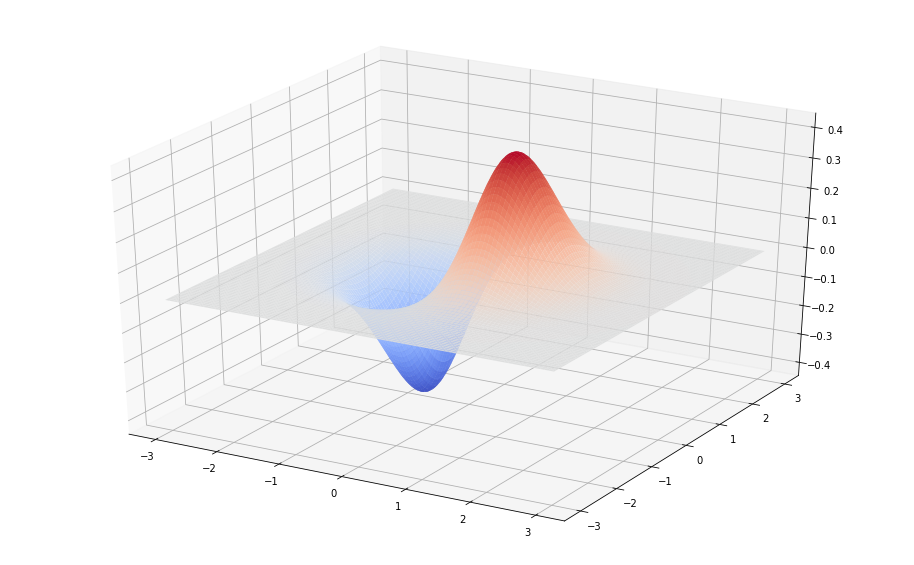

In [69]:
# 
# 在此处补全代码，绘制出3D曲面
# 